In [20]:
#connect to database

import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




connection = pymysql.connect(
    # host='192.168.208.1',
    host='192.168.11.6',
    user='root', 
    password='water',
    database='waterdata',
    port=30000)


dt = 0.01

try:
    with connection.cursor() as cursor:
               
        sql1 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`
                        
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    
                    WHERE  
                        `A`.`meter_no` = "GW967137.1.1" AND `A`.`read_date` > '2014-11-1' AND `A`.`read_date` <= '2017-11-30'
                    ''')
        
        
        sql2 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`
                        
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967138.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    
                    WHERE  
                        `A`.`meter_no` = "GW967138.1.1" AND `B`.`bl_ahd` > 0 AND `A`.`read_date` > '2014-11-1' AND `A`.`read_date` <= '2017-11-30'
                    ''')
        
        
        
        sql3 = ('''  SELECT 
                        `A`.`read_date`, `A`.`meter_no` AS `bl_meter1`, `A`.`bl_ahd` AS `bl_ahd1`, 
                        `B`.`meter_no` AS `bl_meter2`, `B`.`bl_ahd` AS `bl_ahd2`,
                        `C`.`meter_no` AS `meter_no3`, `C`.`sl_read1` AS `sl_read1`,
                        `D`.`meter_no` AS `meter_no4`, `D`.`rf_read1` AS `rf_read1`
                    FROM   
                        `groundwater` AS `A`  
                    INNER JOIN
                        `groundwater` `B` ON (`B`.`meter_no` = "GW967137.2.2" AND `B`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `surfacewater` `C` ON (`C`.`meter_no` = "CF419051" AND `C`.`read_date` = `A`.`read_date` )
                    INNER JOIN
                        `rainfall` `D` ON (`D`.`meter_no` = "54151" AND `D`.`read_date` = `A`.`read_date` )
                    WHERE  
                        `A`.`meter_no` = "GW967137.1.1" AND `A`.`read_date` > '2014-11-1' AND `A`.`read_date` <= '2017-11-30'
                    ''')
        
   
    
    df1_orig = pd.read_sql_query(sql1, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)  ## , index_col="A.read_date"
    df2_orig = pd.read_sql_query(sql2, connection, parse_dates=['read_date','%Y-%m-%d'], coerce_float=True)
    
    

     
  
except:
    print("Error: unable to convert the data")
connection.close()


In [21]:
#filter out incomplete rows from the groundwater series start date
        
df1 = df1_orig[df1_orig['read_date'] >= '2005-11-17']                              # Elfin Crossing Data
df2 = df2_orig[df2_orig['read_date'] >= '2007-09-06']                              # Green Gully Data


#calculate the bore level change for 1 day, 1 week and 1 month

# setup date deltas

day_0 = (df1['read_date'])

day_1 = (day_0) - pd.DateOffset(days=1)
day_7 = (day_0) - pd.DateOffset(days=7)
day_14 = (day_0) - pd.DateOffset(days=14)
day_30 = (day_0) - pd.DateOffset(days=30)


#Elfin

# correct data types

df1['bl_ahd1'] = pd.to_numeric(df1['bl_ahd1'] )
df1['bl_ahd2'] = pd.to_numeric(df1['bl_ahd2'])
df1['sl_read1'] = pd.to_numeric(df1['sl_read1'])

#calculate change in bore levels for each date delta

# GW967137.1.1
                                
E_bl_ahd1_dt1 = df1['bl_ahd1'].shift(-1) - df1['bl_ahd1']
E_bl_ahd1_dt7 = df1['bl_ahd1'].shift(-7) - df1['bl_ahd1']
E_bl_ahd1_dt14 = df1['bl_ahd1'].shift(-14) - df1['bl_ahd1']
E_bl_ahd1_dt30 = df1['bl_ahd1'].shift(-30) - df1['bl_ahd1']


# GW967137.2.2

E_bl_ahd2_dt1 = df1['bl_ahd2'].shift(-1) - df1['bl_ahd2']
E_bl_ahd2_dt7 = df1['bl_ahd2'].shift(-7) - df1['bl_ahd2']
E_bl_ahd2_dt14 = df1['bl_ahd2'].shift(-14) - df1['bl_ahd2']
E_bl_ahd2_dt30 = df1['bl_ahd2'].shift(-30) - df1['bl_ahd2']


# 419051 - surface water

E_sl_read1_dt1 = df1['sl_read1'].shift(-1) - df1['sl_read1']
E_sl_read1_dt7 = df1['sl_read1'].shift(-7) - df1['sl_read1']
E_sl_read1_dt14 = df1['sl_read1'].shift(-14) - df1['sl_read1']
E_sl_read1_dt30 = df1['sl_read1'].shift(-30) - df1['sl_read1']

#insert deltas into data frames


df1.insert(7, 'bl_ahd1_dt1', E_bl_ahd1_dt1)
df1.insert(8, 'bl_ahd2_dt1', E_bl_ahd2_dt1)
df1.insert(9, 'sl_read1_dt1', E_sl_read1_dt1)
df1.insert(10, 'bl_ahd1_dt7', E_bl_ahd1_dt7)
df1.insert(11, 'bl_ahd2_dt7', E_bl_ahd2_dt7)
df1.insert(12, 'sl_read1_dt7', E_sl_read1_dt7)
df1.insert(13, 'bl_ahd1_dt14', E_bl_ahd1_dt14)
df1.insert(14, 'bl_ahd2_dt14', E_bl_ahd2_dt14)
df1.insert(15, 'sl_read1_dt14', E_sl_read1_dt14)
df1.insert(16, 'bl_ahd1_dt30', E_bl_ahd1_dt30)
df1.insert(17, 'bl_ahd2_dt30', E_bl_ahd2_dt30)
df1.insert(18, 'sl_read1_dt30', E_sl_read1_dt30)




#Green Gully

# correct data types

df2['bl_ahd1'] = pd.to_numeric(df2['bl_ahd1'] )
df2['bl_ahd2'] = pd.to_numeric(df2['bl_ahd2'])


#calculate change in bore levels for each date delta

# GW967138.1.1

GG_bl_ahd1_dt1 = df2['bl_ahd1'].shift(-1) - df2['bl_ahd1']
GG_bl_ahd1_dt7 = df2['bl_ahd1'].shift(-7) - df2['bl_ahd1']
GG_bl_ahd1_dt14 = df2['bl_ahd1'].shift(-14) - df2['bl_ahd1']
GG_bl_ahd1_dt30 = df2['bl_ahd1'].shift(-30) - df2['bl_ahd1']

# GW967138.2.2

GG_bl_ahd2_dt1 = df2['bl_ahd2'].shift(-1) - df2['bl_ahd2']
GG_bl_ahd2_dt7 = df2['bl_ahd2'].shift(-7) - df2['bl_ahd2']
GG_bl_ahd2_dt14 = df2['bl_ahd2'].shift(-14) - df2['bl_ahd2']
GG_bl_ahd2_dt30 = df2['bl_ahd2'].shift(-30) - df2['bl_ahd2']


# 419051 - surface water

GG_sl_read1_dt1 = df2['sl_read1'].shift(-1) - df2['sl_read1']
GG_sl_read1_dt7 = df2['sl_read1'].shift(-7) - df2['sl_read1']
GG_sl_read1_dt14 = df2['sl_read1'].shift(-14) - df2['sl_read1']
GG_sl_read1_dt30 = df2['sl_read1'].shift(-30) - df2['sl_read1']

#insert deltas into data frames


df2.insert(7, 'bl_ahd1_dt1', GG_bl_ahd1_dt1)
df2.insert(8, 'bl_ahd2_dt1', GG_bl_ahd2_dt1)
df2.insert(9, 'sl_read1_dt1', GG_sl_read1_dt1)
df2.insert(10, 'bl_ahd1_dt7', GG_bl_ahd1_dt7)
df2.insert(11, 'bl_ahd2_dt7', GG_bl_ahd2_dt7)
df2.insert(12, 'sl_read1_dt7', GG_sl_read1_dt7)
df2.insert(13, 'bl_ahd1_dt14', GG_bl_ahd1_dt14)
df2.insert(14, 'bl_ahd2_dt14', GG_bl_ahd2_dt14)
df2.insert(15, 'sl_read1_dt14', GG_sl_read1_dt14)
df2.insert(16, 'bl_ahd1_dt30', GG_bl_ahd1_dt30)
df2.insert(17, 'bl_ahd2_dt30', GG_bl_ahd2_dt30)
df2.insert(18, 'sl_read1_dt30', GG_sl_read1_dt30)


t1  = df1['read_date']

a1 = df1['bl_ahd1']
a2 = df1['bl_ahd2']
a3 = df2['bl_ahd1']
a4 = df2['bl_ahd2']
s1 = df1['bl_ahd1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s2 = df1['bl_ahd2_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s3 = df1['sl_read1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)

t2  = df2['read_date']
          
s4 = df2['bl_ahd1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s5 = df2['bl_ahd2_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)
s6 = df2['sl_read1_dt14'].to_numpy(dtype='float', na_value=np.nan,copy=True)

#df1.head()

df1.describe()



,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
count,1124.000000,1124.000000,1124.000000,1123.000000,1123.000000,1123.000000,1117.000000,1117.000000,1117.000000,1110.000000,1110.000000,1110.000000,1094.000000,1094.000000,1094.000000
mean,252.973759,251.576774,0.226006,-0.000119,-0.000136,0.000004,-0.000857,-0.000970,0.000019,-0.001680,-0.001934,0.000032,-0.003591,-0.004727,0.000055
std,0.233495,0.171310,0.139163,0.017324,0.008725,0.060759,0.065009,0.026066,0.121080,0.089881,0.034747,0.134606,0.140654,0.055305,0.152005
min,252.531000,251.149000,0.163000,-0.051000,-0.026000,-0.455000,-0.237000,-0.072000,-1.069000,-0.336000,-0.068000,-1.058000,-0.555000,-0.125000,-1.112000
25%,252.912750,251.498750,0.180000,-0.003000,-0.005000,-0.001000,-0.015000,-0.016000,-0.002000,-0.024000,-0.022000,-0.003000,-0.042000,-0.037000,-0.005000
50%,253.015000,251.642000,0.191000,-0.001000,0.000000,0.000000,-0.006000,-0.003000,0.000000,-0.008000,-0.005000,-0.001000,-0.016000,-0.011000,-0.002000
75%,253.061000,251.677000,0.210000,0.001000,0.003000,0.000000,0.003000,0.008000,0.001000,0.005000,0.009000,0.001000,0.006000,0.012000,0.002000
max,253.837000,251.805000,1.601000,0.275000,0.085000,0.881000,0.582000,0.209000,1.340000,0.612000,0.197000,1.261000,0.685000,0.277000,1.349000


In [22]:
df2.describe()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
count,1124.000000,1124.000000,1124.000000,1123.000000,1123.000000,1123.000000,1117.000000,1117.000000,1117.000000,1110.000000,1110.000000,1110.000000,1094.000000,1094.000000,1094.000000
mean,282.049506,279.866080,0.226006,-0.000104,-0.000297,0.000004,-0.000525,-0.001937,0.000019,-0.000623,-0.003541,0.000032,0.000275,-0.006319,0.000055
std,1.349514,0.697203,0.139163,0.114635,0.009342,0.060759,0.346170,0.044738,0.121080,0.458763,0.083312,0.134606,0.628607,0.173457,0.152005
min,280.210000,278.712000,0.163000,-0.437000,-0.022000,-0.455000,-1.790000,-0.077000,-1.069000,-2.220000,-0.110000,-1.058000,-2.513000,-0.173000,-1.112000
25%,280.888500,279.249750,0.180000,-0.008000,-0.006000,-0.001000,-0.048000,-0.029000,-0.002000,-0.090000,-0.052000,-0.003000,-0.169000,-0.109000,-0.005000
50%,281.743000,279.891000,0.191000,-0.005000,-0.002000,0.000000,-0.027000,-0.015000,0.000000,-0.048000,-0.036000,-0.001000,-0.095500,-0.078000,-0.002000
75%,283.108750,280.450500,0.210000,-0.002000,0.003000,0.000000,-0.018000,0.009000,0.001000,-0.032000,0.003000,0.001000,-0.068000,0.002750,0.002000
max,284.730000,280.959000,1.601000,2.602000,0.059000,0.881000,3.437000,0.237000,1.340000,3.450000,0.338000,1.261000,3.896000,0.620000,1.349000


<AxesSubplot:title={'center':'Green Gully Ground Water Depth over Time'}, xlabel='Date', ylabel='AHD(m)'>

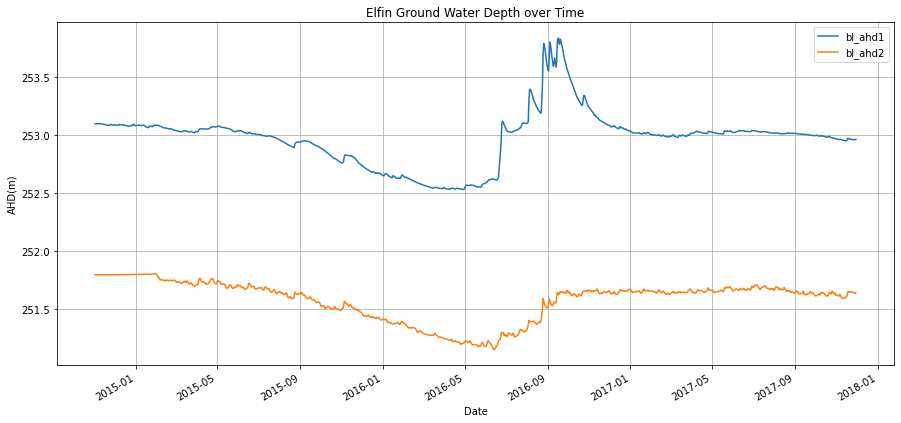

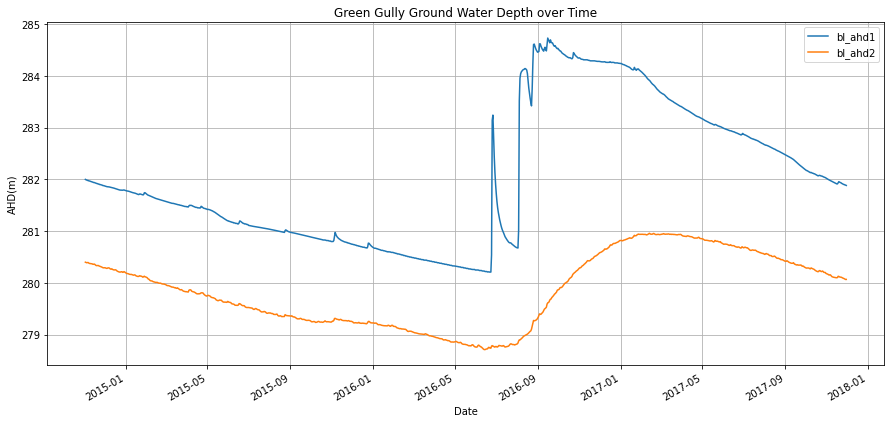

In [23]:
df1.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Elfin Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')
df2.plot(x='read_date', y=['bl_ahd1','bl_ahd2'],figsize=(15,7), grid=True, title='Green Gully Ground Water Depth over Time', xlabel='Date',ylabel='AHD(m)')

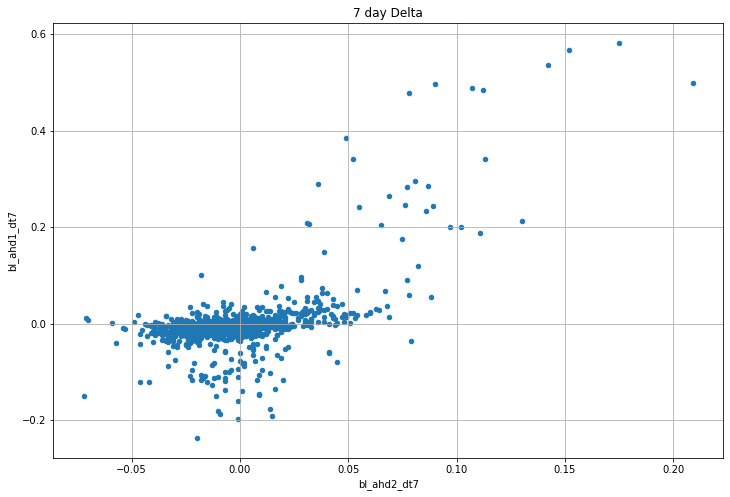

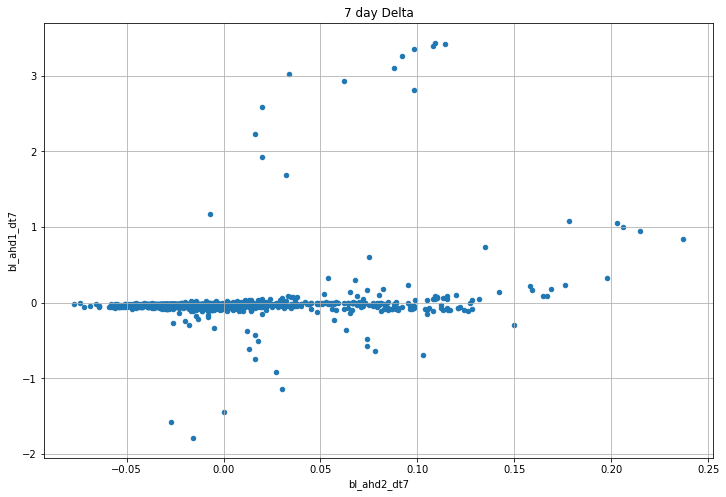

In [24]:
df1.plot.scatter(x='bl_ahd2_dt7', y='bl_ahd1_dt7', figsize=(12, 8), title="7 day Delta", xlabel="GW967137.2.2", ylabel='GW967137.1.1',grid=True)
df2.plot.scatter(x='bl_ahd2_dt7', y='bl_ahd1_dt7', figsize=(12, 8), title="7 day Delta", xlabel='GW967138.2.2', ylabel='GW967138.1.1', grid=True)

plt.show()

In [25]:
df1['bl_ahd2_dt7'].cov(df1['bl_ahd1_dt7'])


0.001062245636032228

In [26]:
df2['bl_ahd2_dt7'].cov(df2['bl_ahd1_dt7'])

0.0039026493936968982

In [27]:
df1['bl_ahd2_dt7'].corr(df1['bl_ahd1_dt7'])

0.6268679275201848

In [28]:
df2['bl_ahd2_dt7'].corr(df2['bl_ahd1_dt7'])

0.25199649342532376

In [29]:
df1['bl_ahd1_dt7'].corr(df1['bl_ahd2_dt7'])

0.6268679275201848

In [30]:
df2['bl_ahd1_dt7'].corr(df2['bl_ahd2_dt7'])

0.25199649342532376

In [31]:
df1.cov()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,0.054520,0.024207,0.021371,-0.000157,0.000137,-0.000895,-0.002161,0.001085,-0.004209,-0.004135,0.002269,-0.005776,-0.010085,0.004416,-0.010168
bl_ahd2,0.024207,0.029347,0.000145,-0.000230,-0.000057,-0.000148,-0.002323,-0.000477,-0.001925,-0.004711,-0.000881,-0.003018,-0.010218,-0.002165,-0.005564
sl_read1,0.021371,0.000145,0.019366,0.000073,0.000002,-0.001846,-0.001774,0.000382,-0.007331,-0.002862,0.000985,-0.009061,-0.005379,0.002351,-0.011555
bl_ahd1_dt1,-0.000157,-0.000230,0.000073,0.000300,0.000068,0.000827,0.000413,0.000030,0.000042,0.000447,0.000032,0.000138,0.000594,0.000126,0.000194
bl_ahd2_dt1,0.000137,-0.000057,0.000002,0.000068,0.000076,0.000151,0.000195,0.000077,0.000211,0.000167,0.000074,0.000160,0.000184,0.000114,0.000136
sl_read1_dt1,-0.000895,-0.000148,-0.001846,0.000827,0.000151,0.003692,0.001058,0.000046,0.001694,0.001201,0.000044,0.002330,0.001117,0.000125,0.001884
bl_ahd1_dt7,-0.002161,-0.002323,-0.001774,0.000413,0.000195,0.001058,0.004226,0.001062,0.006016,0.004039,0.000983,0.003357,0.005363,0.001462,0.004222
bl_ahd2_dt7,0.001085,-0.000477,0.000382,0.000030,0.000077,0.000046,0.001062,0.000679,0.001582,0.001108,0.000603,0.000732,0.001254,0.000813,0.000923
sl_read1_dt7,-0.004209,-0.001925,-0.007331,0.000042,0.000211,0.001694,0.006016,0.001582,0.014660,0.005345,0.001376,0.009059,0.006457,0.001632,0.009915
bl_ahd1_dt14,-0.004135,-0.004711,-0.002862,0.000447,0.000167,0.001201,0.004039,0.001108,0.005345,0.008079,0.002091,0.008701,0.009411,0.002664,0.007215


In [32]:
df2.cov()

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,1.821189,0.674171,0.092080,-0.006559,0.004769,-0.004215,-0.059860,0.033217,-0.018027,-0.105163,0.065096,-0.021617,-0.197607,0.126666,-0.048730
bl_ahd2,0.674171,0.486092,-0.004575,-0.004959,-0.000153,-0.000522,-0.037103,-0.001723,-0.004432,-0.075336,-0.004807,-0.008092,-0.165288,-0.017428,-0.015988
sl_read1,0.092080,-0.004575,0.019366,0.000590,0.000470,-0.001846,-0.001450,0.003653,-0.007331,-0.002965,0.007395,-0.009061,-0.002910,0.015926,-0.011555
bl_ahd1_dt1,-0.006559,-0.004959,0.000590,0.013141,0.000183,0.003628,0.014083,0.000309,0.000014,0.012150,0.000599,-0.000002,0.012392,0.001880,0.000562
bl_ahd2_dt1,0.004769,-0.000153,0.000470,0.000183,0.000087,0.000065,0.000661,0.000274,0.000126,0.000584,0.000488,0.000052,0.000691,0.000995,-0.000059
sl_read1_dt1,-0.004215,-0.000522,-0.001846,0.003628,0.000065,0.003692,0.004439,-0.000008,0.001694,0.004543,-0.000021,0.002330,0.004389,0.000078,0.001884
bl_ahd1_dt7,-0.059860,-0.037103,-0.001450,0.014083,0.000661,0.004439,0.119834,0.003903,0.019495,0.105230,0.005644,0.004953,0.104916,0.013759,0.014530
bl_ahd2_dt7,0.033217,-0.001723,0.003653,0.000309,0.000274,-0.000008,0.003903,0.002001,0.000858,0.004743,0.003468,0.000029,0.005650,0.007030,-0.000345
sl_read1_dt7,-0.018027,-0.004432,-0.007331,0.000014,0.000126,0.001694,0.019495,0.000858,0.014660,0.019648,0.000809,0.009059,0.019491,0.001074,0.009915
bl_ahd1_dt14,-0.105163,-0.075336,-0.002965,0.012150,0.000584,0.004543,0.105230,0.004743,0.019648,0.210463,0.010392,0.024602,0.187884,0.024630,0.029249


In [33]:
df1_corr = df1.corr(method='spearman')

In [34]:
df1_corr

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,1.000000,0.616425,0.730638,-0.089418,0.055129,-0.206888,-0.070608,0.207882,-0.220782,-0.097695,0.305761,-0.181508,-0.141459,0.389553,-0.331309
bl_ahd2,0.616425,1.000000,0.272977,0.090484,-0.022403,0.048697,0.008143,-0.020266,-0.082242,-0.057096,-0.020208,-0.149314,-0.098302,-0.070767,-0.204950
sl_read1,0.730638,0.272977,1.000000,-0.051339,0.085834,-0.257594,0.001584,0.252393,-0.325474,-0.000326,0.370433,-0.340574,-0.017063,0.527059,-0.526445
bl_ahd1_dt1,-0.089418,0.090484,-0.051339,1.000000,0.336502,0.435981,0.528398,0.098422,0.284676,0.447110,0.082553,0.228881,0.359918,0.048943,0.205678
bl_ahd2_dt1,0.055129,-0.022403,0.085834,0.336502,1.000000,0.109635,0.243154,0.311690,0.144512,0.168087,0.246677,0.085663,0.129608,0.213685,0.068583
sl_read1_dt1,-0.206888,0.048697,-0.257594,0.435981,0.109635,1.000000,0.221873,-0.004933,0.365016,0.171062,-0.051028,0.248561,0.130480,-0.122355,0.228962
bl_ahd1_dt7,-0.070608,0.008143,0.001584,0.528398,0.243154,0.221873,1.000000,0.454644,0.631441,0.724588,0.326286,0.436315,0.545875,0.257435,0.325963
bl_ahd2_dt7,0.207882,-0.020266,0.252393,0.098422,0.311690,-0.004933,0.454644,1.000000,0.272851,0.352780,0.597920,0.194243,0.219765,0.480996,0.070958
sl_read1_dt7,-0.220782,-0.082242,-0.325474,0.284676,0.144512,0.365016,0.631441,0.272851,1.000000,0.432856,0.182537,0.632359,0.307679,0.017483,0.476745
bl_ahd1_dt14,-0.097695,-0.057096,-0.000326,0.447110,0.168087,0.171062,0.724588,0.352780,0.432856,1.000000,0.512929,0.587493,0.725155,0.335417,0.457830


<AxesSubplot:>

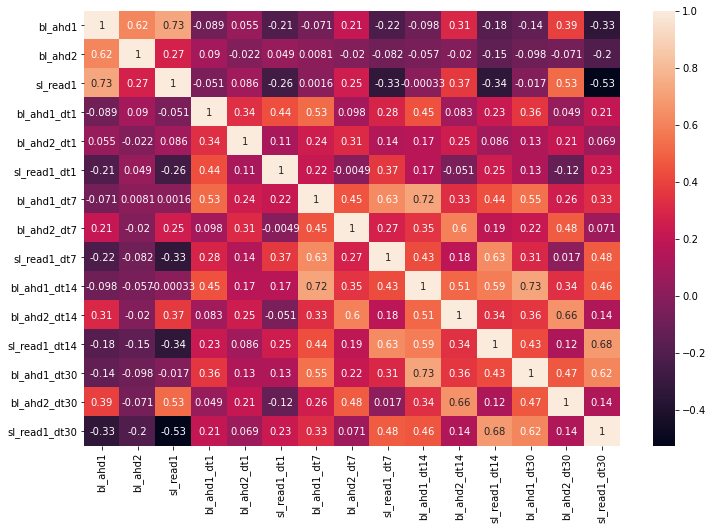

In [35]:
plt.figure(figsize=(12, 8))

sns.heatmap(df1_corr, annot=True)

In [36]:
df2_corr = df2.corr(method='spearman')

df2_corr

,bl_ahd1,bl_ahd2,sl_read1,bl_ahd1_dt1,bl_ahd2_dt1,sl_read1_dt1,bl_ahd1_dt7,bl_ahd2_dt7,sl_read1_dt7,bl_ahd1_dt14,bl_ahd2_dt14,sl_read1_dt14,bl_ahd1_dt30,bl_ahd2_dt30,sl_read1_dt30
bl_ahd1,1.000000,0.781479,0.893216,-0.280492,0.290072,-0.213903,-0.340770,0.340521,-0.320965,-0.356118,0.322786,-0.360573,-0.458925,0.239719,-0.559784
bl_ahd2,0.781479,1.000000,0.592743,-0.241627,0.009689,-0.002308,-0.368454,-0.015819,-0.176670,-0.468139,-0.055648,-0.296503,-0.655450,-0.155262,-0.435633
sl_read1,0.893216,0.592743,1.000000,-0.305354,0.331386,-0.257594,-0.340178,0.414766,-0.325474,-0.317667,0.416968,-0.340574,-0.345067,0.364964,-0.526445
bl_ahd1_dt1,-0.280492,-0.241627,-0.305354,1.000000,0.140113,0.207020,0.614860,-0.021359,0.093728,0.502618,-0.055522,0.098596,0.431245,-0.022146,0.155650
bl_ahd2_dt1,0.290072,0.009689,0.331386,0.140113,1.000000,-0.052563,0.157067,0.565890,-0.064869,0.144900,0.520545,-0.063530,0.136237,0.511073,-0.149713
sl_read1_dt1,-0.213903,-0.002308,-0.257594,0.207020,-0.052563,1.000000,0.105438,-0.142779,0.365016,0.046878,-0.179882,0.248561,-0.005856,-0.197371,0.228962
bl_ahd1_dt7,-0.340770,-0.368454,-0.340178,0.614860,0.157067,0.105438,1.000000,0.222892,0.346357,0.798947,0.118930,0.256623,0.651156,0.121968,0.245380
bl_ahd2_dt7,0.340521,-0.015819,0.414766,-0.021359,0.565890,-0.142779,0.222892,1.000000,0.002718,0.223806,0.798774,-0.027208,0.192741,0.752118,-0.152884
sl_read1_dt7,-0.320965,-0.176670,-0.325474,0.093728,-0.064869,0.365016,0.346357,0.002718,1.000000,0.271109,-0.071759,0.632359,0.195708,-0.122867,0.476745
bl_ahd1_dt14,-0.356118,-0.468139,-0.317667,0.502618,0.144900,0.046878,0.798947,0.223806,0.271109,1.000000,0.271225,0.431811,0.766340,0.225079,0.297986


<AxesSubplot:>

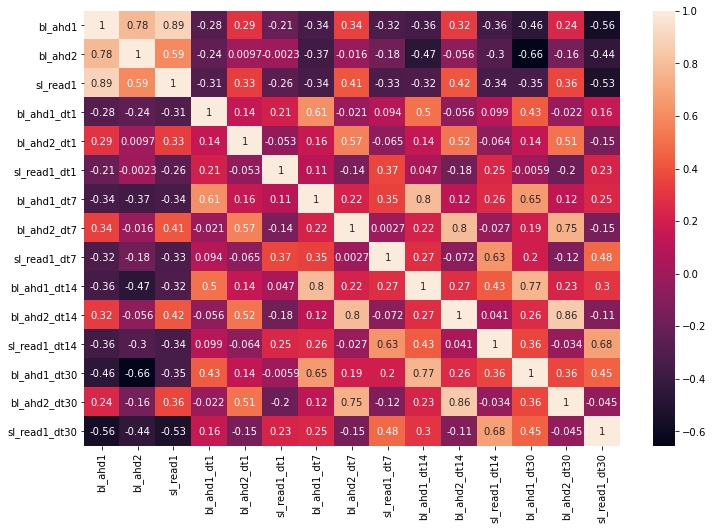

In [37]:


plt.figure(figsize=(12, 8))

sns.heatmap(df2_corr, annot=True)